In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import *
from scipy.stats import norm
from scipy.stats import uniform
from astropy.io import fits
from astropy import units as u
import os
from IPython.display import Image
%matplotlib inline

In [2]:
########### set the file path ###############
root = '/global/u1/j/jialiu/NGphotoz/'
dir_storage = root+'NGphotoz_scratch/'
dir_cosmos = dir_storage+'Cosmo_maps/'
dir_cov = dir_storage+'Cov_maps/'
dir_bias = dir_storage+'Bias_maps/'

In [14]:
######### photo-z bias parameters
zbias_arr = [0, 0.0003, 0.0007, 0.0015]
sigmaz_arr = [0.01, 0.02, 0.04, 0.06]
out_arr = [0, 0.05, 0.1, 0.15]
theta_g_arr = [1,5,10]

zarr=np.linspace(0,4, 501)
delta_z=0.5
tomo_centers=np.arange(0.5, 3, delta_z)

cosmos = [ '%02d_%s'%(i, j) for i in range(25) for j in ['a','f']]
cosmos += ['fid_a', 'fid_f']
tomo_arr = range(1,6)
cones_bias = arange(1,11)
cones_cov = arange(74, 1100)
cones_cosmo = arange(1,6)

pz_lists = genfromtxt(root+'pz_list.txt', dtype='str')
print (pz_lists[:5])

['pz_true.txt' 'pz_zbias0.0003_simgaz0.01_outlier0.05.txt'
 'pz_zbias0.0003_simgaz0.01_outlier0.1.txt'
 'pz_zbias0.0003_simgaz0.01_outlier0.15.txt'
 'pz_zbias0.0003_simgaz0.01_outlier0.txt']


In [20]:
### bias sample fname: biaspz_zbias0_simgaz0.06_outlier0.txt_tomo4_cone10_s10.npy
### JH: The LOS number runs from 74 to 1100, with some missing LOS. You will have 954 in total. 
### JL: LOS 140 and 135 are missing, 198 tomo 3, 4 are missing

def stats_gen_true (theta_g, tomo, cone):
    ipz='pz_true.txt'
    fn = dir_bias+'bias%s_tomo%i_cone%s_s%i.npy'%(ipz, tomo, cone, theta_g)
    return np.load(fn)

def stats_gen_bias (izbias, isz, iout, theta_g, tomo, cone):
    ipz='pz_zbias%s_simgaz%s_outlier%s.txt'%(izbias, isz, iout)
    fn = dir_bias+'bias%s_tomo%i_cone%s_s%i.npy'%(ipz, tomo, cone, theta_g)
#     print (fn)
    return np.load(fn)

def stats_gen_cov (theta_g, tomo, cone): #### cone goes from 74 to 1099, missing some, total 953
    fn = dir_cov+'cov_tomo%i_cone%s_s%i.npy'%(tomo, cone, theta_g)
#     print (fn)
    return np.load(fn)

def stats_gen_cosmo (cosmo, theta_g, tomo, cone): 
    fn = dir_cosmos+'/%s_tomo%i_cone%s_s%i.npy'%(cosmo, tomo, cone, theta_g)
#     print (fn)
    return np.load(fn)
  
####### test file generation functions - all pass
test = 0
if test:
    izbias, isz, iout = 0.0015, 0.06, 0.15
    theta_g, tomo, cone = 1, 4, 1
    cosmo = cosmos[-5]

    out = stats_gen_true(theta_g, tomo, cone)
    out = stats_gen_bias (izbias, isz, iout, theta_g, tomo, cone)
    out = stats_gen_cov (theta_g, tomo, 74)
    out = stats_gen_cosmo (cosmo, theta_g, tomo, cone)
    ell, ps, ps1, ps2, kappa, peaks, minima, pdf, mf0, mf1, mf2 = out

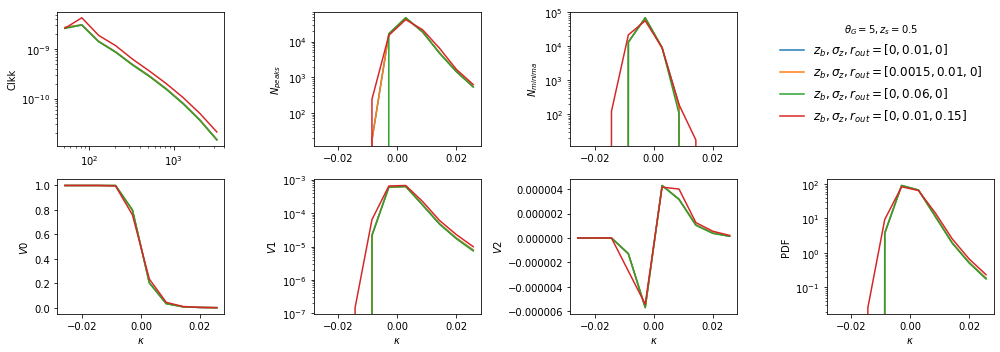

In [53]:
############ plot the stats

izbias, isz, iout = 0.0015, 0.06, 0.15

params=[[0, 0.01, 0],
        [izbias, 0.01, 0],
        [0, isz, 0],
        [0, 0.01, iout]]

itheta_g, itomo = theta_g_arr[1], tomo_arr[0] 

# for itheta_g in theta_g_arr:
#     for itomo in tomo_arr:
f,axes=subplots(2,4,figsize=(14,5))
for iparam in params:
    iizbias, iisz, iiout = iparam
#     print (iizbias, iisz, iiout, itheta_g, itomo)
    out = mean(array([stats_gen_bias (iizbias, iisz, iiout, itheta_g, itomo, icone) for icone in cones_bias]),axis=0)
    ell, ps, ps1, ps2, kappa, peaks, minima, pdf, mf0, mf1, mf2 = out
    axes[0][0].plot(ell, ps, label=r'$z_b, \sigma_z, r_{out}=[%s, %s, %s]$'%(iizbias, iisz, iiout))
    axes[0][1].plot(kappa, peaks)
    axes[0][2].plot(kappa, minima)
    axes[1][3].plot(kappa, pdf)
    axes[1][0].plot(kappa, mf0)
    axes[1][1].plot(kappa, mf1)
    axes[1][2].plot(kappa, mf2)

lines, labels = axes[0][0].get_legend_handles_labels()
axes[0][3].legend(lines, labels, title=r'$\theta_G=%s, z_s=%s$'%(itheta_g, tomo_centers[itomo-1]), fontsize=12, frameon=0)

axes[0][0].set_xscale('log')
axes[0][0].set_yscale('log')
axes[0][1].set_yscale('log')
axes[0][2].set_yscale('log')
axes[1][3].set_yscale('log')
axes[1][1].set_yscale('log')
# axes[1][2].set_yscale('symlog')

axes[1][0].set_xlabel(r'$\kappa$')
axes[1][1].set_xlabel(r'$\kappa$')
axes[1][2].set_xlabel(r'$\kappa$')
axes[1][3].set_xlabel(r'$\kappa$')
axes[0][0].set_ylabel('Clkk')
axes[0][1].set_ylabel(r'$N_{peaks}$')
axes[0][2].set_ylabel(r'$N_{minima}$')
axes[1][3].set_ylabel('PDF')
axes[1][0].set_ylabel('$V0$')
axes[1][1].set_ylabel('$V1$')
axes[1][2].set_ylabel('$V2$')
axes[0][3].axis('off')
plt.tight_layout()
#         savefig('plots/stats_thetaG%s_zs%s.png'%(itheta_g, tomo_centers[itomo-1]))
#         close()

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
/usr/common/software/python/3.7-anacond

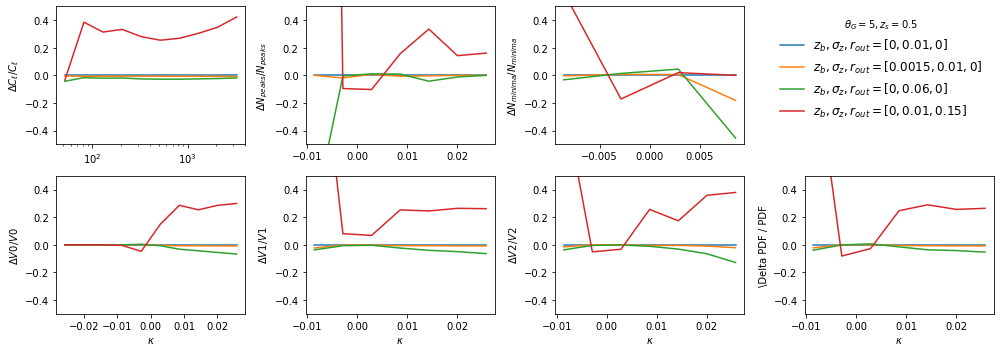

In [63]:
########## plot the difference in stats for different bias parameters

izbias, isz, iout = 0.0015, 0.06, 0.15

params=[[0, 0.01, 0],
        [izbias, 0.01, 0],
        [0, isz, 0],
        [0, 0.01, iout]]

itheta_g, itomo = theta_g_arr[1], tomo_arr[0] 

# for itheta_g in theta_g_arr:
#     for itomo in tomo_arr:

f,axes=subplots(2,4,figsize=(14,5))
i=0
for iparam in params:    
    iizbias, iisz, iiout = iparam
    out_all = array([stats_gen_bias (iizbias, iisz, iiout, itheta_g, itomo, icone) for icone in cones_bias])
    out = mean(out_all,axis=0)
    if i==0: #### i should also check for the true model, where sz=0, instead of 0.01
        ell_fidu, ps_fidu, ps1_fidu, ps2_fidu, kappa_fidu, peaks_fidu, minima_fidu, pdf_fidu, mf0_fidu, mf1_fidu, mf2_fidu = out
        out0 = out_all
    ########### to add: error bar for 10 cones
    ell, ps, ps1, ps2, kappa, peaks, minima, pdf, mf0, mf1, mf2 = out
    axes[0][0].plot(ell, ps/ps_fidu-1, label=r'$z_b, \sigma_z, r_{out}=[%s, %s, %s]$'%(iizbias, iisz, iiout))
    axes[0][1].plot(kappa, peaks/peaks_fidu-1)
    axes[0][2].plot(kappa, minima/minima_fidu-1)
    axes[1][3].plot(kappa, pdf/pdf_fidu-1)
    axes[1][0].plot(kappa, mf0/mf0_fidu-1)
    axes[1][1].plot(kappa, mf1/mf1_fidu-1)
    axes[1][2].plot(kappa, mf2/mf2_fidu-1)
    i+=1

lines, labels = axes[0][0].get_legend_handles_labels()
axes[0][3].legend(lines, labels, title=r'$\theta_G=%s, z_s=%s$'%(itheta_g, tomo_centers[itomo-1]), fontsize=12, frameon=0)

axes[0][0].set_xscale('log')
y0, y1=-0.5, 0.5

axes[0][0].set_ylim(y0, y1)
axes[0][1].set_ylim(y0, y1)
axes[0][2].set_ylim(y0, y1)
axes[1][0].set_ylim(y0, y1)
axes[1][1].set_ylim(y0, y1)
axes[1][2].set_ylim(y0, y1)
axes[1][3].set_ylim(y0, y1)

axes[1][0].set_xlabel(r'$\kappa$')
axes[1][1].set_xlabel(r'$\kappa$')
axes[1][2].set_xlabel(r'$\kappa$')
axes[1][3].set_xlabel(r'$\kappa$')
axes[0][0].set_ylabel('$\Delta C_\ell/C_\ell$')
axes[0][1].set_ylabel(r'$\Delta N_{peaks} / N_{peaks}$')
axes[0][2].set_ylabel(r'$\Delta N_{minima} / N_{minima}$')
axes[1][3].set_ylabel('\Delta PDF / PDF')
axes[1][0].set_ylabel('$\Delta V0 / V0$')
axes[1][1].set_ylabel('$\Delta V1 / V1$')
axes[1][2].set_ylabel('$\Delta V2 / V2$')
axes[0][3].axis('off')
plt.tight_layout()

#         savefig('plots/diff_stats_thetaG%s_zs%s.png'%(itheta_g, tomo_centers[itomo-1]))
#         close()